# Loan Prediction Excercise

## 1. Load packages

In [100]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

## 2. Load data

In [3]:
train = pd.read_csv('train_ctrUa4K.csv')

In [4]:
test = pd.read_csv('test_lAUu6dG.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_original = train.copy()

In [8]:
test_original = test.copy()

## 3. Understanding the data 

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
test.shape

(367, 12)

In [13]:
train.shape

(614, 13)

## 4. Univariate analysis

### 4.1 Visualising the dependent variable

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

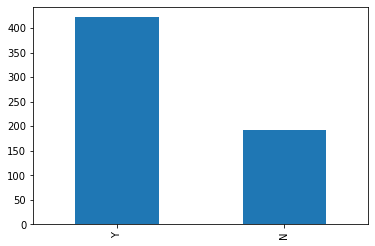

In [15]:
train['Loan_Status'].value_counts().plot.bar()

### 4.2 Visualising the independent variables

#### 4.2.1 Categorical variables
Gender	Married	Education	Self_Employed	Loan_Status

<AxesSubplot:title={'center':'Self_Employed'}>

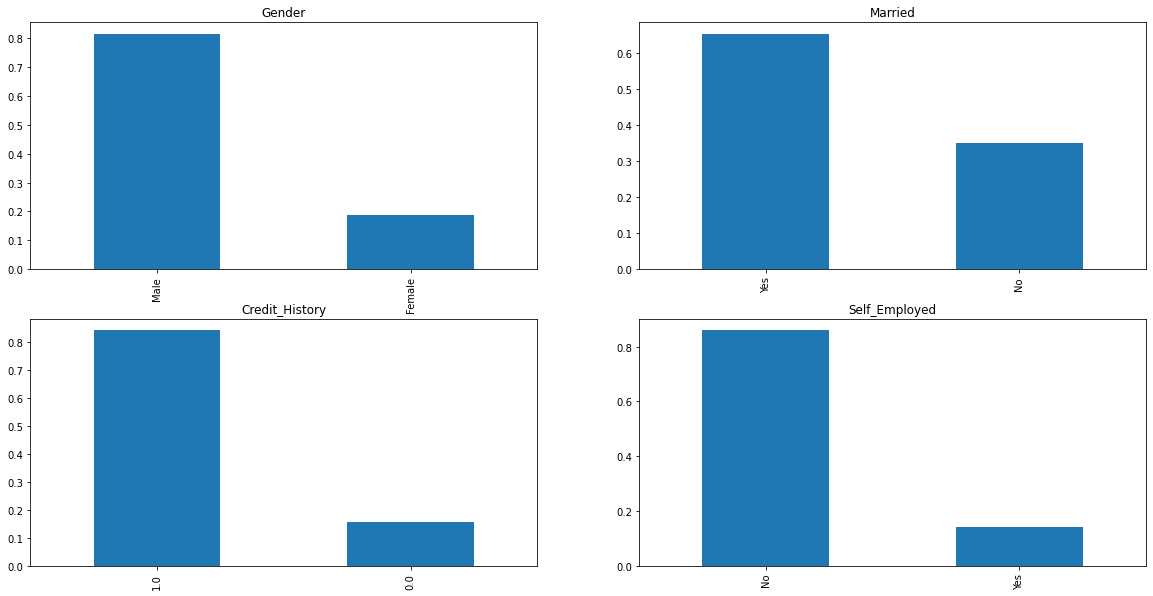

In [16]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.subplot(224)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")


#### 4.2.2 Ordinal variables
Dependent Education Property_Area

<AxesSubplot:title={'center':'Property_Area'}>

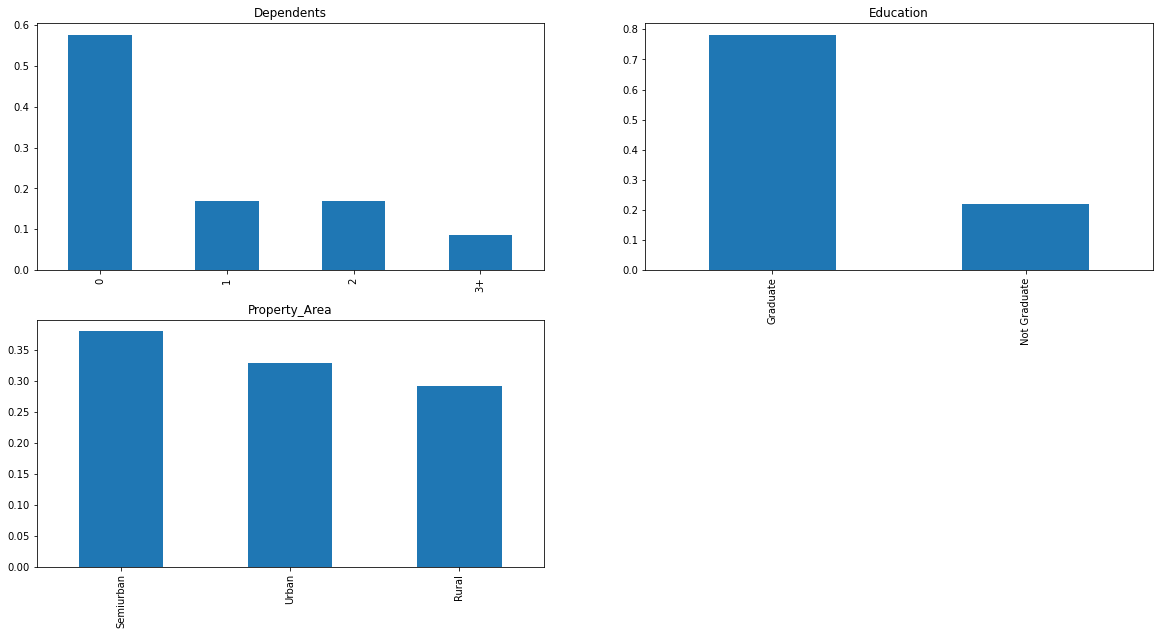

In [17]:
plt.figure(1)
plt.subplot(221)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Dependents")

plt.subplot(222)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(223)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")


#### 4.2.3 Numerical variables
ApplicantIncome CoapplilcantIncome LoanAmount 

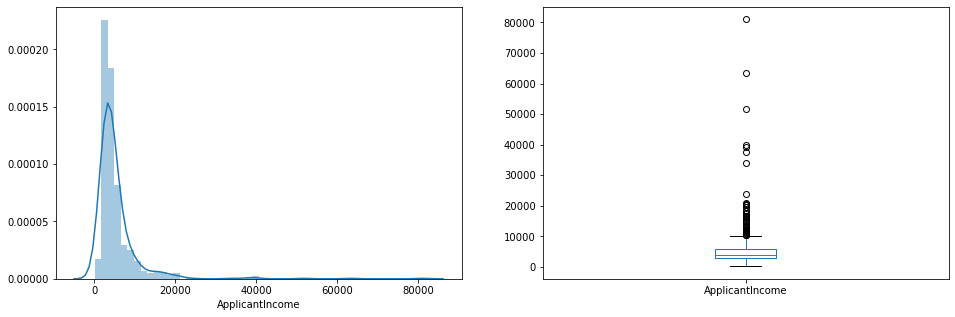

In [18]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

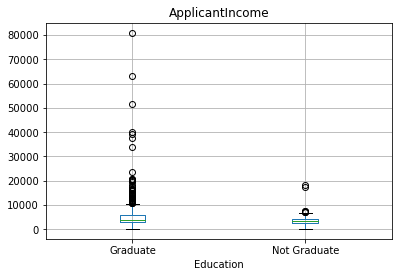

In [19]:
#split by Education
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")


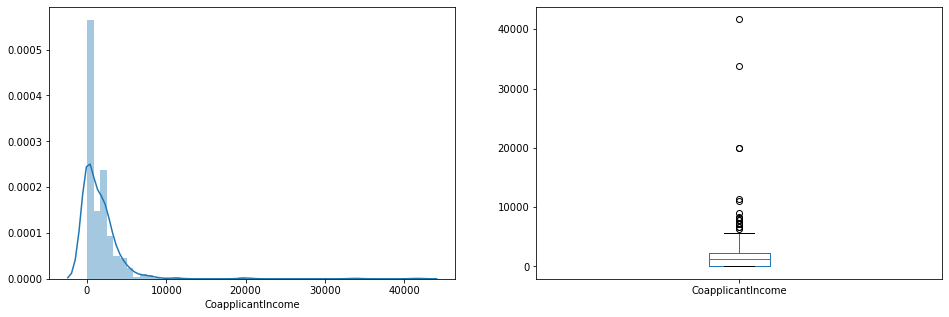

In [20]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

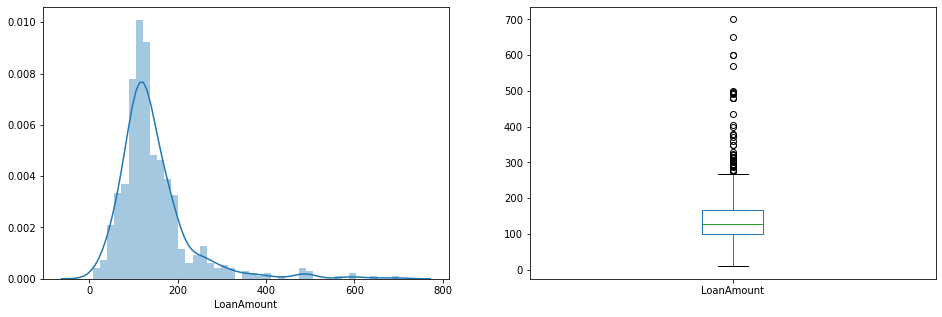

In [21]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## 5. Bivariate analysis

### 5.1 Categorical independent vs Target variable

In [22]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [23]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [24]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

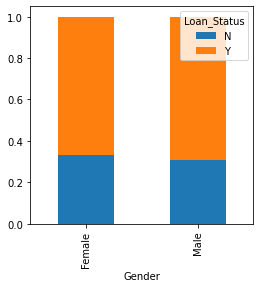

In [25]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [26]:
cat_vars = train[['Married','Dependents','Education','Self_Employed']]

In [27]:
cat_vars.head()

,Married,Dependents,Education,Self_Employed
0,No,0,Graduate,No
1,Yes,1,Graduate,No
2,Yes,0,Graduate,Yes
3,Yes,0,Not Graduate,No
4,No,0,Graduate,No


Married
Dependents
Education
Self_Employed
Credit_History
Property_Area


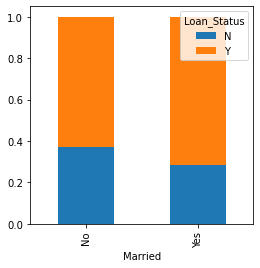

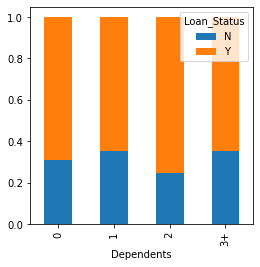

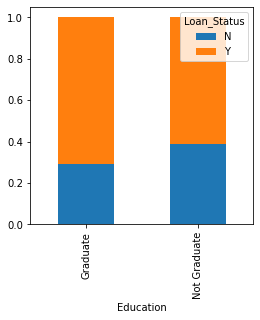

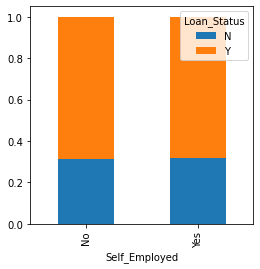

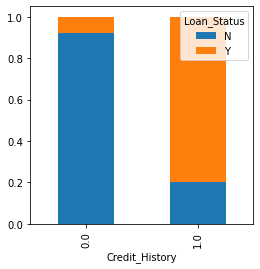

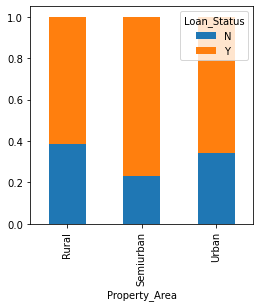

In [28]:
for iteration, col in enumerate(train[['Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]):
    print(col)
    values = train[col]
    var = pd.crosstab(values,train['Loan_Status'])
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


### 5.2 Numerical variables vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

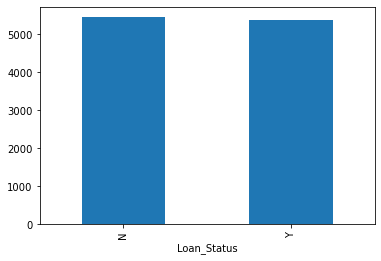

In [29]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [30]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

In [31]:
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [32]:
def check_stacked(cat,dep):
    var = pd.crosstab(cat,dep)
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
    plt.xlabel(cat.name)
    plt.ylabel('Percentage')


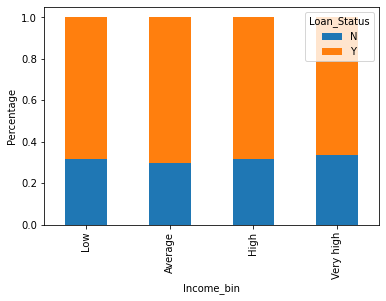

In [33]:
check_stacked(train['Income_bin'],train['Loan_Status'])

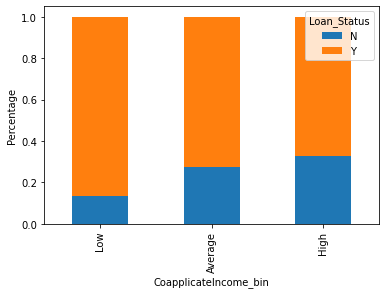

In [34]:
bins=[0,1000,3000,42000] 
group = ['Low','Average','High']
train['CoapplicateIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

check_stacked(train['CoapplicateIncome_bin'],train['Loan_Status'])

In [35]:
train['Total_Income']=train['CoapplicantIncome']+train['ApplicantIncome']

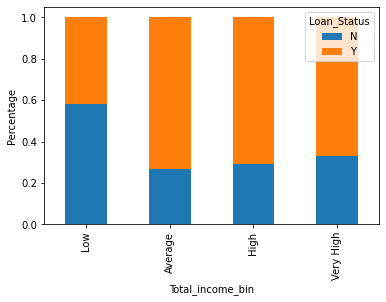

In [36]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very High']
train['Total_income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

check_stacked(train['Total_income_bin'],train['Loan_Status'])

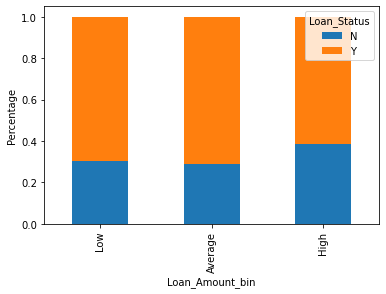

In [37]:
bins=[0,100,200,700] 
group = ['Low','Average','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

check_stacked(train['Loan_Amount_bin'],train['Loan_Status'])

In [38]:
### drop the bins and change some categorical in numerical so we can check correlation 

In [39]:
train = train.drop(['Income_bin','CoapplicateIncome_bin','Loan_Amount_bin','Total_income_bin','Total_Income'], axis=1) 

In [40]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

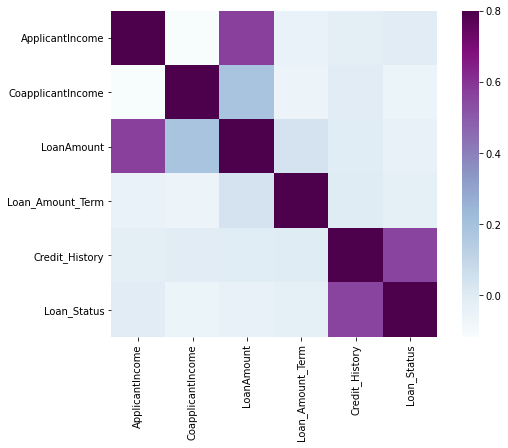

In [41]:
matrix=train.corr()
matrix
ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [42]:
matrix


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


## 6. Missing value and outlier treatment

### 6.1 Missing value treatment

In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# replace missing values with mode in categorical vars

In [45]:
def fillna_mode(df):
        df.fillna(df.mode()[0],inplace=True)
        

In [46]:
fillna_mode(train['Gender'])
fillna_mode(train['Married'])
fillna_mode(train['Dependents'])
fillna_mode(train['Self_Employed'])
fillna_mode(train['Credit_History'])


In [47]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
# Numerical values can be imputed by the mode or mean
# -> many same values: mode
# -> broad distribution with outliers: median

In [49]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
fillna_mode(train['Loan_Amount_Term'])

In [51]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [52]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [53]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
fillna_mode(test['Gender'])
fillna_mode(test['Married'])
fillna_mode(test['Dependents'])
fillna_mode(test['Self_Employed'])
fillna_mode(test['Credit_History'])
fillna_mode(test['Loan_Amount_Term'])
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

### 6.2 Outlier treatment

In [55]:
#by applying a log transformation, the impact of extremes gets reduced

<AxesSubplot:>

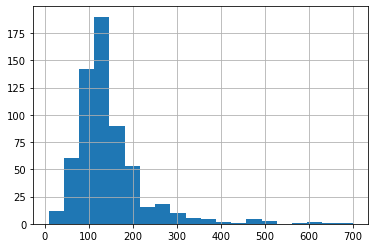

In [58]:
train['LoanAmount'].hist(bins=20)

<AxesSubplot:>

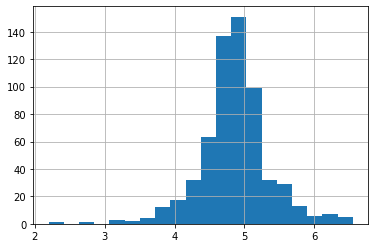

In [57]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [59]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

## 7. Model building

### 7.1 Logistic Regression

#### 7.1.1 drop independents which have no effect on the dependent

In [64]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [66]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

#### 7.1.2 drop the dependent and save it in another dataset

In [68]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [70]:
y = train.Loan_Status
x = train.drop('Loan_Status',1)

#### 7.1.3 create dummy variables from the categorical data 

In [71]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#### 7.1.4 create a validation set 

In [79]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.3)

#### 7.1.5 run the model 

In [82]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [105]:
LogisticRegression(C=1.0, 
                   class_weight=None, 
                   dual=False, 
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr', 
                   n_jobs=1, 
                   penalty='12', 
                   random_state=1,
                   solver='liblinear',
                   tol=0.0001, 
                   verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [84]:
pred_cv=model.predict(x_cv)

In [85]:
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [86]:
pred_test=model.predict(test)

## 8. Validation

In [91]:
# Using K-fold validationab

In [99]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
Accuracy score 0.8048780487804879

2 of kfold 5
Accuracy score 0.8373983739837398

3 of kfold 5
Accuracy score 0.7804878048780488

4 of kfold 5
Accuracy score 0.7886178861788617

5 of kfold 5
Accuracy score 0.7950819672131147


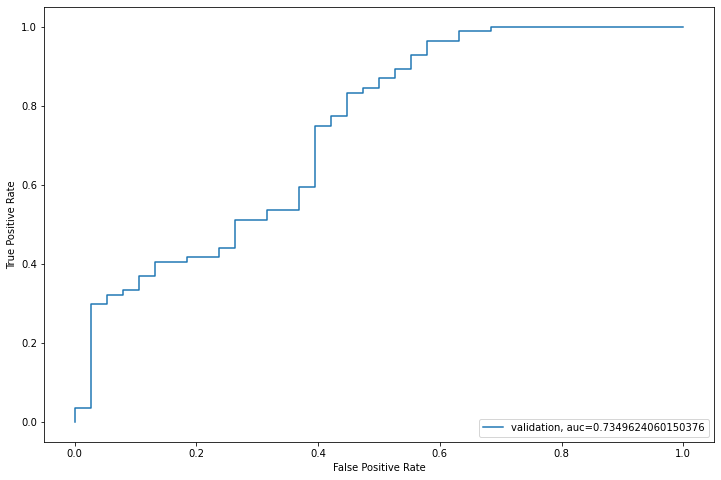

In [104]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## 9. Feature Engineering